### NuHTC Inference

In [1]:
!pwd

/home/sul084/immune-decoder/segmentation/NuHTC


In [1]:
# # Segment image by image
# # OG
# !CUDA_VISIBLE_DEVICES=0 python tools/infer.py demo/imgs \
#     configs/nuhtc/htc_lite_swin_pytorch_fpn_PanNuke_seasaw_CAS.py \
#     models/pannuke.pth --out demo/imgs_infer

# CoNIC
!CUDA_VISIBLE_DEVICES=0 python tools/infer.py demo/imgs_2 \
    configs/nuhtc/htc_lite_swin_pytorch_fpn_PanNuke_seasaw_CAS.py \
    models/pannuke.pth --out demo/imgs_2_infer


/home/sul084/miniconda3/envs/nuhtc/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/home/sul084/miniconda3/envs/nuhtc/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
load checkpoint from local path: models/pannuke.pth
/home/sul084/immune-decoder/segmentation/NuHTC/thirdparty/mmdetection/mmdet/datasets/utils.py:65: UserWarning: "ImageToTensor" pipeline is replaced by "Def

In [3]:
!CUDA_VISIBLE_DEVICES=0 python tools/infer_wsi.py demo/imgs_2 configs/nuhtc/htc_lite_swin_pytorch_fpn_PanNuke_seasaw_CAS.py models/pannuke.pth \
--patch --seg --stitch --patch_size 256 --step_size 192 --margin 1 --min_area 10 \
--batch_size 32 --save_dir demo/imgs_2 --mode qupath

/home/sul084/miniconda3/envs/nuhtc/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/home/sul084/miniconda3/envs/nuhtc/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
source:  demo/imgs_2
patch_save_dir:  demo/imgs_2/patches
mask_save_dir:  demo/imgs_2/masks
stitch_save_dir:  demo/imgs_2/stitches
source : demo/imgs_2
save_dir : demo/imgs_2
patch_save_dir : demo/imgs_2/pat

### NuHTC Train

In [7]:
### Please modify the `fold = 1` content to change the fold.
!CUDA_VISIBLE_DEVICES=0 python tools/train.py \
    configs/nuhtc/htc_lite_swin_pytorch_fpn_PanNuke_seasaw_CAS.py \
    --no-validate

/home/sul084/miniconda3/envs/nuhtc/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2025-05-02 10:51:38,152 - mmdet.nuhtc - INFO - [<StreamHandler <stderr> (INFO)>, <FileHandler /home/sul084/immune-decoder/segmentation/NuHTC/work_dirs/htc_lite_swin_pytorch_seasaw_FPN_AttenROI_thres_96_base_aug_cas_PanNuke_full_epoch_200_fold1/20250502_105138.log (INFO)>]
2025-05-02 10:51:38,153 - mmdet.nuhtc - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.10.16 (main, Dec 11 2024, 16:24:50) [GCC 11.2.0]
CUDA available: True
GPU 0: Quadro P6000
CUDA_HOME: /home/sul084/miniconda3

### NuHTC Test

In [8]:
!CONFIG_NAME=htc_lite_swin_pytorch_fpn_PanNuke_seasaw_CAS.py
!WEIGHT_BASE_PATH=work_dirs/htc_lite_swin_pytorch_seasaw_FPN_AttenROI_thres_96_base_aug_cas_PanNuke_full_epoch_200_fold1

# Predict nuclei from images
!CUDA_VISIBLE_DEVICES=0 python tools/test.py \
    $WEIGHT_BASE_PATH/$CONFIG_NAME $WEIGHT_BASE_PATH/latest.pth \
    --eval bbox --samples_per_gpu 16 \
    --eval-options save=True format=pannuke save_path=$WEIGHT_BASE_PATH overlay=False


/home/sul084/miniconda3/envs/nuhtc/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
Traceback (most recent call last):
  File "/home/sul084/immune-decoder/segmentation/NuHTC/tools/test.py", line 271, in <module>
    main()
  File "/home/sul084/immune-decoder/segmentation/NuHTC/tools/test.py", line 137, in main
    cfg = Config.fromfile(args.config)
  File "/home/sul084/miniconda3/envs/nuhtc/lib/python3.10/site-packages/mmcv/utils/config.py", line 342, in fromfile
    cfg_dict, cfg_text = Config._file2dict(filename,
  File "/home/sul084/miniconda3/envs/nuhtc/lib/python3.10/site-packages/mmcv/utils/config.py", line 185, in _file2di

In [ ]:
# Calculate the metric
!python tools/analysis_tools/pannuke/compute_stats.py --true_path=datasets/PanNuke/masks/fold3/masks.npy --type_path=datasets/PanNuke/masks/fold3/types.npy \
--pred_path=$WEIGHT_BASE_PATH/PanNukeCocoDataset/preds_pannuke.npy --save_path=$WEIGHT_BASE_PATH

### Cell Merging

In [17]:
# v2, 58 min
!python poly_merge_v2.py \
    /home/sul084/immune-decoder/segmentation/NuHTC/demo/wsi_infer/TCGA-3C-AALI-01Z-00-DX2.CF4496E0-AB52-4F3E-BDF5-C34833B91B7C \
    contour_256

100%|████████████████████████████████| 1491011/1491011 [58:11<00:00, 427.00it/s]


In [23]:
# v3, working copy!! Last updated: 5/21

# Larger file ~10 min
# !python poly_merge_v3.py \
#     /home/sul084/immune-decoder/segmentation/NuHTC/demo/wsi_infer/BL-13 \
#     BL-13-K40642

# Smaller file ~2 min
!python poly_merge_v3.py \
    --datadir /home/sul084/immune-decoder/segmentation/NuHTC/demo/wsi_infer/TCGA-AC-A2FK \
    --geojson_name TCGA-AC-A2FK-01Z-00-DX1.033F3C27-9860-4EF3-9330-37DE5EC45724 \
    --overlap_threshold 0.05 \
    --merge_strategy area --uniform_classification # Save as uniform if arg is specified (store_true)
    

Starting overlap removal...
Iteration 0
160625it [00:36, 4446.25it/s]
len of poly_uid_map: 160442
100%|█████████████████████████████████| 160625/160625 [00:21<00:00, 7368.85it/s]
Iteration 0: Found overlap of # cells: 10283
Iteration 1
150277it [00:32, 4582.38it/s]
len of poly_uid_map: 150277
100%|███████████████████████████████| 150277/150277 [00:01<00:00, 106566.42it/s]
Iteration 1: Found overlap of # cells: 0
Found all overlapping cells
Cell overlap removal elapsed time: 93.2112 seconds
Converting to geojson...
Saving as flat list of geojson features...
Merge and save complete.


In [15]:
# Comparing thresholds: saving new geojson with cells filtered out in 0.01 but kept in 0.05 threshold
# Last updated: 5/21

import json
from shapely.geometry import shape

# Load the two GeoJSON files
datadir = '/home/sul084/immune-decoder/segmentation/NuHTC/demo/wsi_infer/TCGA-AC-A2FK'
geo_001 = f"{datadir}/processed_001_TCGA-AC-A2FK-01Z-00-DX1.033F3C27-9860-4EF3-9330-37DE5EC45724.geojson"
geo_005 = f"{datadir}/processed_005_TCGA-AC-A2FK-01Z-00-DX1.033F3C27-9860-4EF3-9330-37DE5EC45724.geojson"

with open(geo_001, 'r') as f:
    gdf_001 = json.load(f) # List 

with open(geo_005, 'r') as f:
    gdf_005 = json.load(f) # List 
    
print(len(gdf_001))
print(len(gdf_005))

# Build a set of (geometry_wkt, properties) for fast lookup
seen_features = {
    (shape(feat["geometry"]).wkt, json.dumps(feat["properties"], sort_keys=True))
    for feat in gdf_001
}

# Extract features in gdf_005 not in gdf_001
non_overlapping = []
for feat in gdf_005:
    geom_wkt = shape(feat["geometry"]).wkt
    props_str = json.dumps(feat["properties"], sort_keys=True)
    if (geom_wkt, props_str) not in seen_features:
        non_overlapping.append(feat)

print(f"Found {len(non_overlapping)} non-overlapping features.")

# Save as GeoJSON list of features
with open(f"{datadir}/old_intersection_difference.geojson", "w") as f:
    json.dump(non_overlapping, f)


149597
150121
Found 543 non-overlapping features.


In [4]:
## 5/23: Checking iterations # with Bao's most updated nuclei_merge.py (git pulled from repo)

!python /home/sul084/immune-decoder/segmentation/NuHTC/tools/nuclei_merge.py \
    --datadir /home/sul084/immune-decoder/segmentation/NuHTC/demo/wsi_infer/BL-13 \
    --geojson_name BL-13-K40642 \
    --overlap_threshold 0.05 \
    --merge_strategy probability # --uniform_classification # Save as uniform if arg is specified (store_true)


Starting overlap removal...
Iteration 0
  0%|                                                     | 0/3 [00:00<?, ?it/s]
Traceback (most recent call last):
  File "/home/sul084/immune-decoder/segmentation/NuHTC/tools/nuclei_merge.py", line 233, in <module>
    main()
  File "/home/sul084/immune-decoder/segmentation/NuHTC/tools/nuclei_merge.py", line 184, in main
    data_processed = merge_overlap(data, 
  File "/home/sul084/immune-decoder/segmentation/NuHTC/tools/nuclei_merge.py", line 73, in merge_overlap
    poly = Polygon(cell_info['geometry']['coordinates'][0])
  File "/home/sul084/miniconda3/envs/nuhtc/lib/python3.10/site-packages/shapely/geometry/polygon.py", line 237, in __new__
    shell = LinearRing(shell)
  File "/home/sul084/miniconda3/envs/nuhtc/lib/python3.10/site-packages/shapely/geometry/polygon.py", line 93, in __new__
    coordinates = np.array([_coords(o) for o in coordinates])
  File "/home/sul084/miniconda3/envs/nuhtc/lib/python3.10/site-packages/shapely/geometry/po

In [16]:
import json

# Before overlap removal
datadir = 'immune-decoder/segmentation/NuHTC/demo/wsi_infer/TCGA-AC-A2FK'
geojson_name = 'TCGA-AC-A2FK-01Z-00-DX1.033F3C27-9860-4EF3-9330-37DE5EC45724'
with open(f'{datadir}/{geojson_name}.geojson', 'r') as f:
    data = json.load(f) # List 
print(len(data))
print(data[0])
print(type(data))

# After overlap removal
datadir = '/home/sul084/immune-decoder/segmentation/NuHTC/demo/wsi_infer/TCGA-AC-A2FK'
geojson_name = 'processed_TCGA-AC-A2FK-01Z-00-DX1.033F3C27-9860-4EF3-9330-37DE5EC45724'
with open(f'{datadir}/{geojson_name}.geojson', 'r') as f:
    data = json.load(f) # List 
print()
print(len(data))
print(data[0])
print(type(data))

160625
{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[1312, 7827], [1310, 7829], [1310, 7832], [1309, 7833], [1309, 7834], [1310, 7835], [1310, 7836], [1311, 7836], [1312, 7837], [1316, 7837], [1317, 7836], [1317, 7835], [1318, 7834], [1318, 7829], [1316, 7827], [1312, 7827]]]}, 'properties': {'objectType': 'annotation', 'label': 1, 'score': 0.9531745910644531, 'classification': {'name': 'I', 'color': [0, 255, 0]}, 'isLocked': False}}
<class 'list'>

150121
{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[1155, 8047], [1154, 8048], [1154, 8052], [1155, 8053], [1155, 8054], [1160, 8059], [1160, 8060], [1163, 8063], [1164, 8063], [1165, 8064], [1167, 8064], [1168, 8063], [1168, 8059], [1167, 8058], [1167, 8056], [1166, 8055], [1166, 8054], [1164, 8052], [1164, 8051], [1162, 8049], [1161, 8049], [1159, 8047], [1155, 8047]]]}, 'properties': {'type': 'Feature', 'properties': {'objectType': 'annotation', 'label': 2, 'score': 0.9856187105178833, 'cl

In [28]:
import pandas as pd
merged_cells = pd.DataFrame(data)
print(merged_cells.columns)

Index(['type', 'geometry', 'properties'], dtype='object')


In [50]:
cell = merged_cells.iloc[0]
print(cell)
print()
print(cell['geometry']['coordinates'])


type                                                    Feature
geometry      {'type': 'Polygon', 'coordinates': [[[1312, 78...
properties    {'objectType': 'annotation', 'label': 1, 'scor...
Name: 0, dtype: object

[[[1312, 7827], [1310, 7829], [1310, 7832], [1309, 7833], [1309, 7834], [1310, 7835], [1310, 7836], [1311, 7836], [1312, 7837], [1316, 7837], [1317, 7836], [1317, 7835], [1318, 7834], [1318, 7829], [1316, 7827], [1312, 7827]]]


In [57]:
for idx, cell_info in merged_cells.iterrows():
    print(f'idx {idx}')
    print(f'cell_info {cell_info}\n')
    poly = Polygon(cell_info['geometry']['coordinates'][0])

    if not poly.is_valid:
        print("Found invalid polygon - Fixing with buffer 0")
        multi = poly.buffer(0)
        if isinstance(multi, MultiPolygon):
            if len(multi) > 1:
                poly_idx = np.argmax([p.area for p in multi])
                poly = multi[poly_idx]
                poly = Polygon(poly)
            else:
                poly = multi[0]
                poly = Polygon(poly)
        else:
            poly = Polygon(multi)
            
    # poly.uid = idx

    break

print(poly)

idx 0
cell_info type                                                    Feature
geometry      {'type': 'Polygon', 'coordinates': [[[1312, 78...
properties    {'objectType': 'annotation', 'label': 1, 'scor...
Name: 0, dtype: object

POLYGON ((1312 7827, 1310 7829, 1310 7832, 1309 7833, 1309 7834, 1310 7835, 1310 7836, 1311 7836, 1312 7837, 1316 7837, 1317 7836, 1317 7835, 1318 7834, 1318 7829, 1316 7827, 1312 7827))


In [60]:
dir(poly)

['__and__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_geom',
 '_geom_prepared',
 '_ndim',
 '_repr_svg_',
 'area',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'contains_properly',
 'convex_hull',
 'coords',
 'covered_by',
 'covers',
 'crosses',
 'difference',
 'disjoint',
 'distance',
 'dwithin',
 'envelope',
 'equals',
 'equals_exact',
 'exterior',
 'from_bounds',
 'geom_type',
 'geometryType',
 'has_m',
 'has_z',
 'hausdorff_distance',
 'interiors',
 'interpolate',
 'intersection',
 'intersects',
 'is_closed',
 'is_empty',
 'is_ring',
 'is_simple',
 'is_va

In [3]:
import pandas as pd
contour = pd.read_csv("/home/sul084/immune-decoder/segmentation/NuHTC/demo/wsi_infer/TCGA-3C-AALI-01Z-00-DX2.CF4496E0-AB52-4F3E-BDF5-C34833B91B7C/contour_256_v2.csv")
print(contour.columns)

Index(['id', 'annidx', 'elementidx', 'type', 'group', 'score', 'color', 'xmin',
       'ymin', 'xmax', 'ymax', 'bbox_area', 'coords_x', 'coords_y', 'keep'],
      dtype='object')


In [8]:
print(contour['type'].unique()) ## ?
print(contour['group'].unique()) ## Nuclei type
print(contour['keep'].unique())

['polyline']
['C' 'I' 'T' 'E' 'D']
[1]


In [19]:
# v3
!python poly_merge_v3.py \
    /home/sul084/immune-decoder/segmentation/NuHTC/demo/wsi_infer/TCGA-3C-AALI-01Z-00-DX2.CF4496E0-AB52-4F3E-BDF5-C34833B91B7C \
    contour_256

  7%|██▎                            | 109422/1491011 [13:40<2:52:40, 133.35it/s]
Traceback (most recent call last):
  File "/home/sul084/immune-decoder/segmentation/NuHTC/poly_merge_v3.py", line 126, in <module>
    main()
  File "/home/sul084/immune-decoder/segmentation/NuHTC/poly_merge_v3.py", line 91, in main
    if len(overlap_ids) <= 1:
KeyboardInterrupt


### Misc

Text(0.5, 1.0, 'Segmentation Inference')

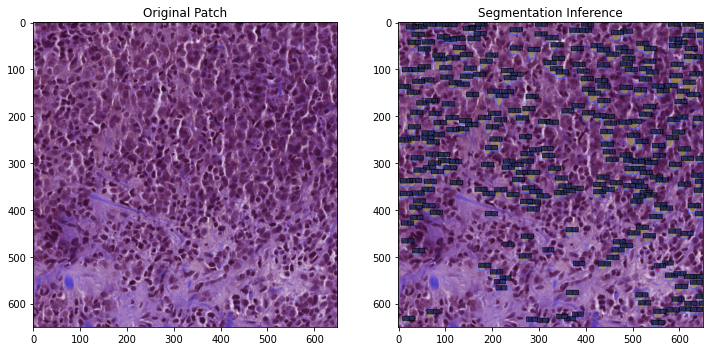

In [64]:
# Visualization

import tifffile
import matplotlib.pyplot as plt
import cv2
import numpy as np
import openslide

img_path = "/home/sul084/immune-decoder/segmentation/NuHTC/demo/imgs_2/901.png"
inf_path = "/home/sul084/immune-decoder/segmentation/NuHTC/demo/imgs_2_infer/901.png"
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
inf = cv2.imread(inf_path, cv2.IMREAD_COLOR)
# inf = cv2.cvtColor(inf, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(img)
# plt.axis('off')
plt.title('Original Patch')
plt.subplot(1,2,2)
plt.imshow(inf)
# plt.axis('off')
plt.title('Segmentation Inference')

In [68]:
## Saving IMPRESS svs as png for NuHTC inference
import openslide
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cv2
import imageio
from PIL import Image
import tifffile as tiff

base_dir = "/home/sul084/immune-decoder/segmentation/CellViT-plus-plus/"
svs_path = f"{base_dir}/test_database/901_HE.svs"
cells_json_path = f"{base_dir}/outputs/901_HE_cells.json"

# Load the SVS image
slide = openslide.OpenSlide(svs_path)
thumbnail = slide.get_thumbnail((slide.dimensions[0], slide.dimensions[1]))
thumbnail_np = np.array(thumbnail)
image = thumbnail_np

patch_x, patch_y = 8500, 12000
patch_size = 650
img_patch = image[patch_y:patch_y+patch_size, patch_x:patch_x+patch_size]
# imageio.imwrite("/home/sul084/immune-decoder/segmentation/NuHTC/demo/imgs_2/901.png", img_patch) # Save as png

# img.save("/home/sul084/immune-decoder/segmentation/CellViT-plus-plus/test_database/901_HE_patch.tif") # Save as tif
tiff.imwrite("/home/sul084/immune-decoder/segmentation/CellViT-plus-plus/test_database/901_HE_patch.tif", img_patch)

# # plt.figure(figsize=(16,12))
# plt.subplot(1, 2, 1)
# plt.imshow(img_patch)
# plt.title("Cell Image")
# plt.show()
